# Eurostat European Big Data Hackathon 2025

<img src="https://cros.ec.europa.eu/system/files/inline-images/EU-Big-Data-Hackathon-2025_horiz_0.jpg" width="500"/>


Eurostat is organizing the fifth round of the European Big Data Hackathon from 6 to 11 March 2025 (including the presentation by the winners at the NTTS) in Brussels. 

The purpose of the 2025 hackathon is to foster expertise in integrating Earth Observation data with official statistics for producing innovative ideas for statistical products and tools relevant for the EU policies. 


The European Big Data Hackathon takes place every two years and gathers teams from all over Europe to compete for the best solution to a statistical challenge. The teams develop innovative approaches, applications and data products combining official statistics and big data that can help to answer pressing EU policy and/or statistical questions.

_Source: https://cros.ec.europa.eu/2025EuropeanBigDataHackathon_

# How to download, visualise and run some basic statistics on ERA5 data

*Written by William Ray for the participants of the 5th European Big Data Hackathon 2025.*

In this notebook you are shown how to:

- Download ERA5 data from the Climate Data Store using API.
- How to visualise the downloaded data using xarray.
- Run some basic statistics such as the average temperature over a year.
- Visualise the average temperature difference between 1950 and 2023.

Before you get started you will need to create an account at the [Climate Data Store](https://cds.climate.copernicus.eu/).



In [21]:
import sys
!{sys.executable} -m pip install netcdf4 h5netcdf

#cdsapi cartopy 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 51.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 116.0 MB/s eta 0:00:00


In [23]:
#!pip install xarray dask cartopy cdsapi netCDF4
# Python Standard Libraries
import os
import datetime as dt

# Data Manipulation Libraries
import numpy as np
import xarray as xr

# Visualization Libraries
import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap

# Climate Data Store API for retrieving climate data
import cdsapi

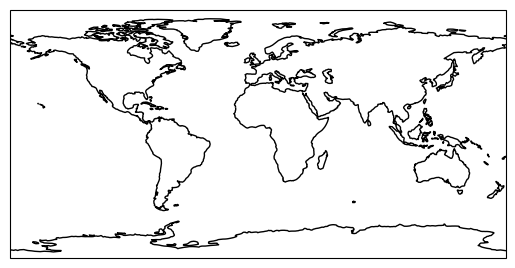

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cdsapi

# Create a new plot with a specific projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines to the map
ax.coastlines()

# Display the map
plt.show()



## Downloading the Data

First, we'll load ERA5 data from the [Climate Data Store (CDS)](https://doi.org/10.24381/cds.f17050d7) using the `cdsapi`, including the land-sea mask. To do this, save your CDS API key in the **$HOME/.cdsapirc** file. In addition you have to have accepted ***Terms of use*** in the CDS portal.

New to CDS? Consider reading the [CDS tutorial](https://ecmwf-projects.github.io/copernicus-training-c3s/cds-tutorial.html) for a detailed guide.


In [11]:
file_name = {}  # dictionary containing [data source : file name]

# Add the data sources and file names
file_name.update({"era5": "temperature_era5.nc"})

# Create the paths to the files
path_to = {
    source: os.path.join(f"data/{source}/", file) for source, file in file_name.items()
}

# Create necessary directories if they do not exist
for path in path_to.values():
    os.makedirs(
        os.path.dirname(path), exist_ok=True
    )  # create the folder if not available

path_to

{'era5': 'data/era5/temperature_era5.nc'}

In [19]:
%%time 
client = cdsapi.Client()

dataset = 'reanalysis-era5-single-levels-monthly-means'
request = {
  'product_type': ['monthly_averaged_reanalysis'],
  'variable': ['2m_temperature', 'land_sea_mask'],
  'year': ['1950', '2023'],
  'month': list(range(1, 13)),
  'time': '00:00',
  'data_format': 'netcdf',
  'download_format': 'unarchived' 
}
target = path_to['era5']

client.retrieve(dataset, request, target)

2025-02-12 23:50:44,109 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-02-12 23:50:44,110 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-02-12 23:50:44,386 INFO Request ID is 3b11ead2-f1f3-4c72-a9d7-a1960a94ba54
2025-02-12 23:50:44,459 INFO status has been updated to accepted
2025-02-12 23:50:52,904 INFO status has been updated to running
2025-02-12 23:51:17,129 WARNING Structural differences in grib fields detected when opening in xarray. Opening the grib file safely, however this may result in files with non-intuitive filenames.
2025-02-12 23:51:34,293 INFO status has been updated to successful


e9a04fe1eaaf242a610f063716893608.nc:   0%|          | 0.00/47.9M [00:00<?, ?B/s]

CPU times: user 181 ms, sys: 201 ms, total: 382 ms
Wall time: 52 s


'data/era5/temperature_era5.nc'

In [14]:
c = cdsapi.Client(url=URL, key=KEY)

c.retrieve(
  'reanalysis-era5-single-levels-monthly-means',
  {
    'format': 'netcdf',
    'product_type': 'monthly_averaged_reanalysis',
    'variable': ['2m_temperature', 'land_sea_mask'],
    'year': list(range(1950, 2023)),
    'month': list(range(1, 13)),
    'time': '00:00',
    # 'grid': [0.25, 0.25],
  },
  path_to['era5']
)

2025-02-12 23:22:46,231 INFO Sending request to https://cds.climate.copernicus.eu/api//resources/reanalysis-era5-single-levels-monthly-means


Exception: Not Found

## Opening the dataset

Now it is downloaded, we can open the dataset and inspect it using `xarray`.

In [24]:
data = xr.open_dataset('data/era5/temperature_era5.nc')
data

ValueError: found the following matches with the input file in xarray's IO backends: ['netcdf4', 'h5netcdf']. But their dependencies may not be installed, see:
https://docs.xarray.dev/en/stable/user-guide/io.html 
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html

In [ ]:
lat = data.latitude
lon = data.longitude
longitude= data.longitude-180
data = data.sortby(longitude)

temp_2m = data.t2m[0,:,:]


In [ ]:
m = Basemap(projection='cyl', llcrnrlon=-20, llcrnrlat=30, urcrnrlon=50, urcrnrlat=80,resolution='i')
m.drawcoastlines(1)
m.drawcountries()

parallels = np.arange(-90,90+0.25,20)
m.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.5)
meridians = np.arange(-180,180+0.25,20)
m.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.5)

cf = plt.contourf(longitude, lat, temp_2m, cmap='jet')
cb = plt.colorbar(cf, fraction=0.0235, pad=0.02)
cb.set_label(' \u00b0K', fontsize=15, rotation=0)

plt.show()

## Calculate the yearly average for 1950

In [ ]:
start_date = "1950-01-01"
end_date = "1950-12-01"

temp_1950 = data.sel(valid_time=slice(start_date, end_date))
temp_1950

In [ ]:
mean_1950 = temp_1950.t2m.sum(dim="valid_time") / 12
mean_1950

In [ ]:
m = Basemap(projection='cyl', llcrnrlon=-20, llcrnrlat=30, urcrnrlon=50, urcrnrlat=80,resolution='i')
m.drawcoastlines(1)
m.drawcountries()

parallels = np.arange(-90,90+0.25,20)
m.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.5)
meridians = np.arange(-180,180+0.25,20)
m.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.5)

cf = plt.contourf(longitude, lat, mean_1950, cmap='jet')
cb = plt.colorbar(cf, fraction=0.0235, pad=0.02)
cb.set_label(' \u00b0K', fontsize=15, rotation=0)

plt.show()

## Calculate the yearly average for 2020 and then visualise the difference between the average temperature in 1950 and 2020

In [ ]:
start_date = "2020-01-01"
end_date = "2020-12-01"

temp_2020 = data.sel(valid_time=slice(start_date, end_date))
temp_2020

In [ ]:
mean_2020 = temp_2020.t2m.sum(dim="valid_time") / 12
mean_2020

In [ ]:
m = Basemap(projection='cyl', llcrnrlon=-20, llcrnrlat=30, urcrnrlon=50, urcrnrlat=80,resolution='i')
m.drawcoastlines(1)
m.drawcountries()

parallels = np.arange(-90,90+0.25,20)
m.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.5)
meridians = np.arange(-180,180+0.25,20)
m.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.5)

cf = plt.contourf(longitude, lat, mean_1950 - mean_2020, cmap='jet')
cb = plt.colorbar(cf, fraction=0.0235, pad=0.02)
cb.set_label(' \u00b0K', fontsize=15, rotation=0)

plt.show()